In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx

In [3]:
my_movies= pd.read_csv('my_movies.csv')
my_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
my_movies.drop(columns=['V1','V2','V3','V4','V5'],inplace=True,axis=1)
my_movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
#Apriori Algorithm

In [6]:
frequent_itemsets=apriori(my_movies, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(LOTR1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [8]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,(LOTR),"(Green Mile, Gladiator, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
196,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
136,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
215,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
158,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
214,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
211,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
159,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
201,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(LOTR1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [10]:
import seaborn as sns

<AxesSubplot:xlabel='support', ylabel='confidence'>

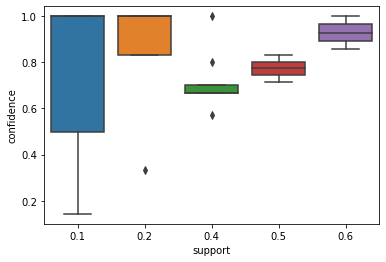

In [11]:
sns.boxplot(x='support',y='confidence',data=rules)

<AxesSubplot:xlabel='support', ylabel='confidence'>

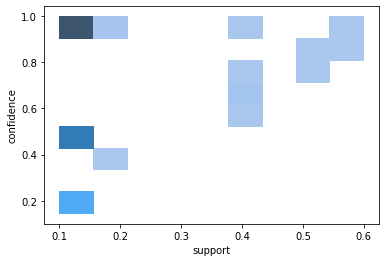

In [12]:
sns.histplot(x='support',y='confidence',data=rules)

<AxesSubplot:xlabel='support', ylabel='confidence'>

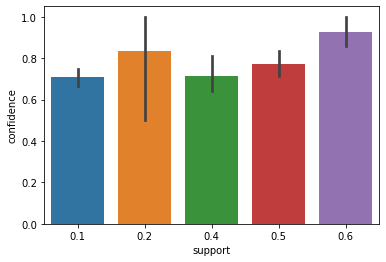

In [13]:
sns.barplot(x='support',y='confidence',data=rules)

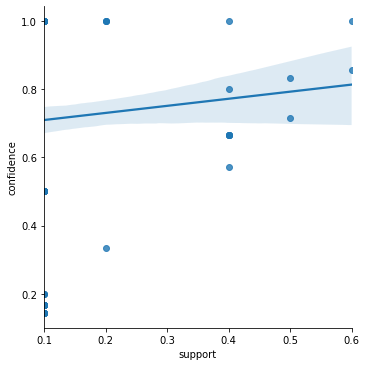

In [14]:
sns.lmplot(x='support',y='confidence',data=rules)

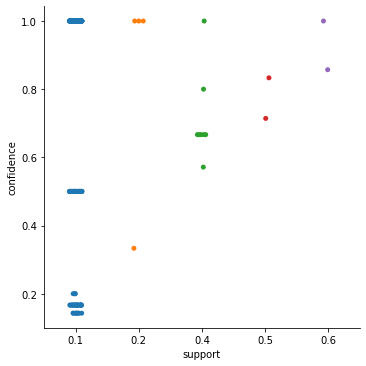

In [15]:
sns.catplot(x='support',y='confidence',data=rules)

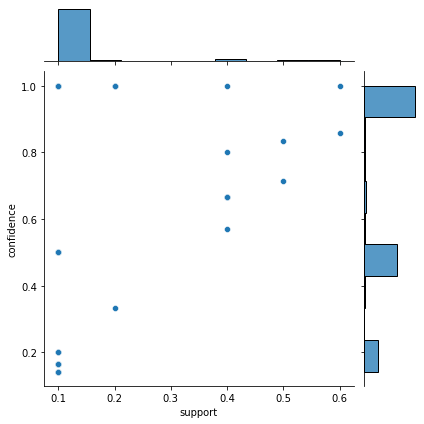

In [16]:
sns.jointplot(x='support',y='confidence',data=rules)

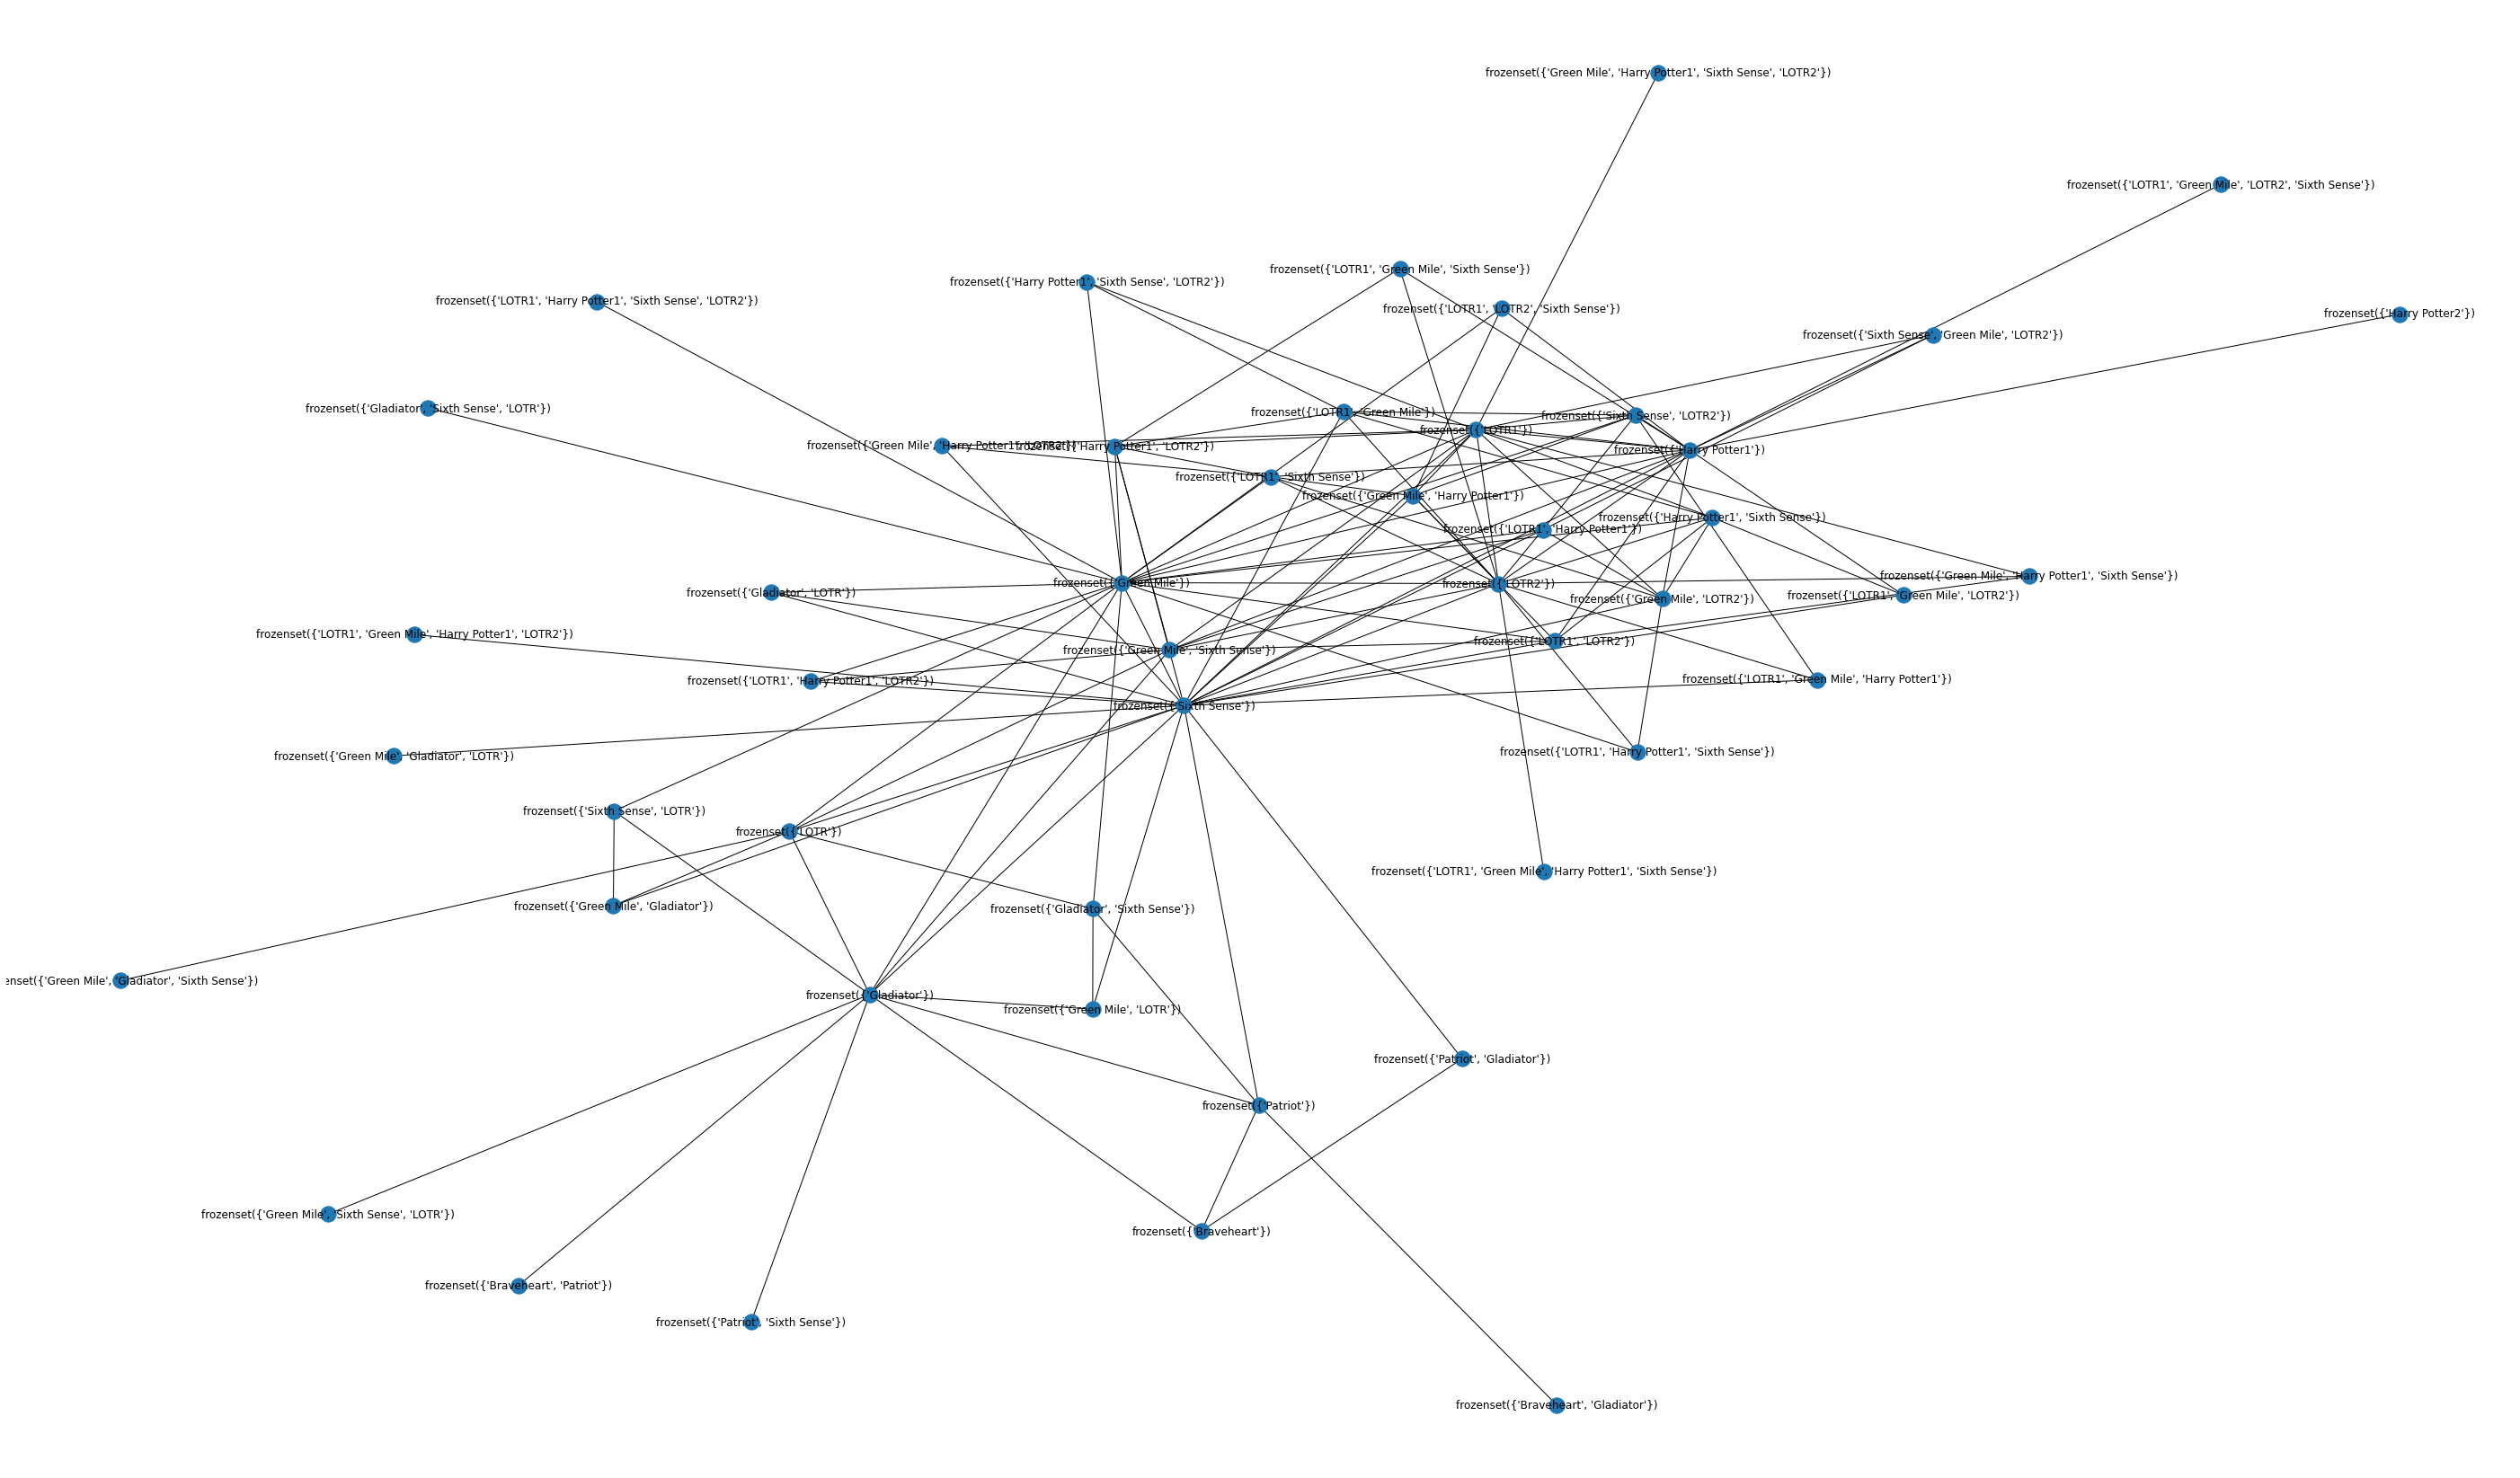

In [21]:
#NetworkX Visualization
fig, ax=plt.subplots(figsize=(50,30))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()